# Clean wl data

Remove period with bad data

In [1]:
import mikeio
import numpy as np

In [2]:
fn_raw = "raw_data/Holyrood_Bay_wl.dfs0"
fn_out = "../observations/Holyrood_Bay_wl.dfs0"

In [3]:
ds = mikeio.read(fn_raw)

<Axes: xlabel='time', ylabel='Water level [undefined]'>

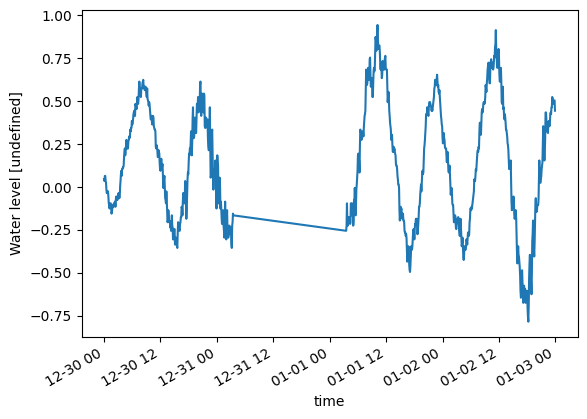

In [4]:
ds[0].sel(time=slice("2017-12-30", "2018-01-02")).plot()

<Axes: xlabel='time', ylabel='Water level [undefined]'>

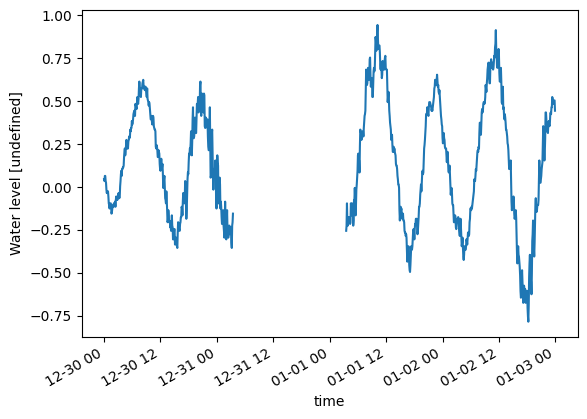

In [5]:
bad_slice = slice("2017-12-31 03:30", "2018-01-01 03:30")
idx1 = np.where(ds.time==bad_slice.start)[0][0]
idx2 = np.where(ds.time==bad_slice.stop)[0][0]
ds[0].values[idx1:idx2] = np.nan
ds[0].sel(time=slice("2017-12-30", "2018-01-02")).plot()

In [6]:
q = mikeio.ItemInfo(mikeio.EUMType.Surface_Elevation)
ds[0].item = q

In [7]:
ds.to_dfs(fn_out)